# Multi Objective Losses Analysis

This notebook contains the analysis for the multi objective loss experiments. First, import some libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

LOSSES_FILE = '/home/mitchell/multiObjectiveExperiments/all_losses.csv'

Read in the dataset and show the first few rows. The dataset shows the following for each trial:
* **perf**: The estimated performance for the final genotype.
* **mcc**: The computed mcc loss for the final genotype
* **lambda**: The lambda value for the loss function. The loss function is computed as

```
loss = (1.0 - |mcc(predictions, labels)|) + (lambda * performance(genotype))
```

* **experiment**: The experiment number. 3 trials were performed for each lambda value.

In [2]:
df = pd.read_csv(LOSSES_FILE)
print(df.shape)
df.head()

(30, 4)


,perf,mcc,lambda,experiment
0,810.0,0.124890,0.000100,2
1,903.0,0.155962,0.000100,0
2,981.0,0.163707,0.000100,1
3,6334.5,0.047454,0.000001,2
4,4681.0,0.067800,0.000001,0


Generate two plots:
* **Correctness as a function of lambda**
* **Performance as a function of lambda**

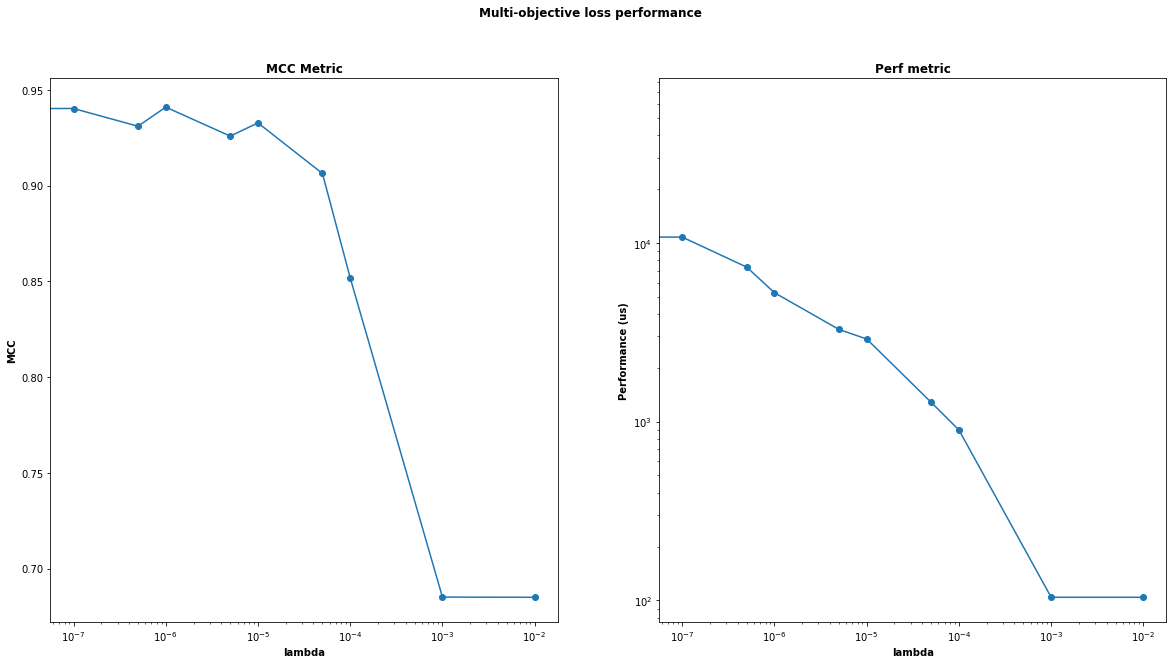

In [3]:
def generate_plots(df):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    
    distinct_lambdas = list(sorted(df['lambda'].unique()))
     
    perf_means = []
    perf_stds = []
    mcc_means = []
    mcc_stds = []
    
    for distinct_lambda in distinct_lambdas:    
        filtered = df[df['lambda'] == distinct_lambda]
        
        mcc_series = 1.0 - filtered['mcc']
        
        perf_means.append(np.mean(filtered['perf']))
        perf_stds.append(np.std(filtered['perf']))
        mcc_means.append(np.mean(mcc_series))
        mcc_stds.append(np.std(mcc_series))
        
    ax[0].plot(distinct_lambdas, mcc_means)
    ax[0].scatter(distinct_lambdas, mcc_means)
    ax[0].set_title('MCC Metric', fontweight='bold')
    ax[0].set_xlabel('lambda', fontweight='bold')
    ax[0].set_ylabel('MCC', fontweight='bold')
    ax[0].set_xscale('log')
    
    ax[1].plot(distinct_lambdas, perf_means)
    ax[1].scatter(distinct_lambdas, perf_means)
    ax[1].set_title('Perf metric', fontweight='bold')
    ax[1].set_xlabel('lambda', fontweight='bold')
    ax[1].set_ylabel('Performance (us)', fontweight='bold')
    ax[1].set_xscale('log')
    ax[1].set_yscale('log')
    
    fig.suptitle('Multi-objective loss performance', fontweight='bold')
    
    plt.show()
    
generate_plots(df)

We see that the correctness isn't really affected until lambda = 0.0001, while performance linearly decreases until that point. When lambda = 0.001, performance is the primary driver, and yields useless models. This shows that the model is responding to this parameter, and in an actual application, much care would need to be taken to set this parameter properly.